<a href="https://colab.research.google.com/github/chandan-m-chandu/Basic-Machine-Learning-Projects-/blob/main/Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

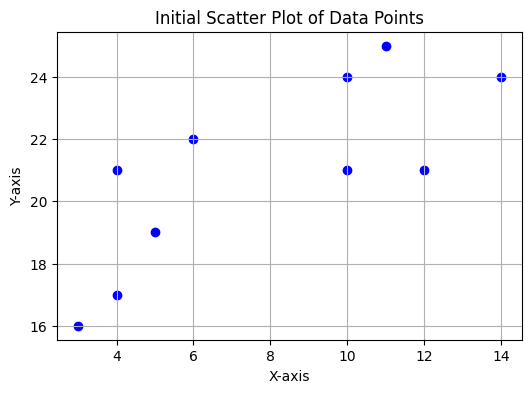

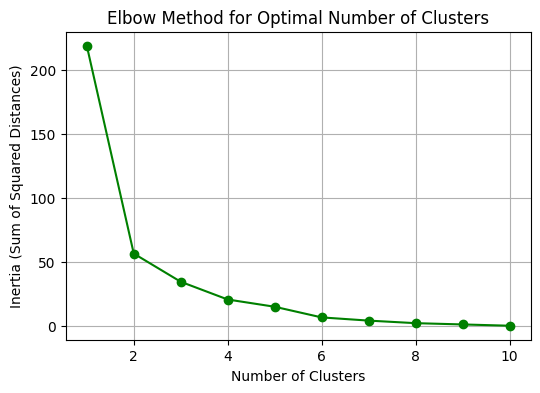

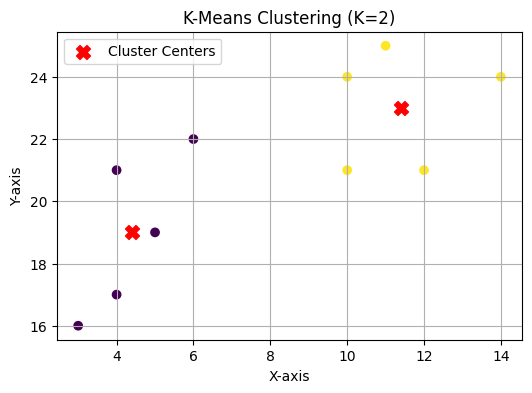

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Data
x = [4, 5, 10, 4, 3, 11, 14, 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

# 1. Initial Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, color='blue')
plt.title('Initial Scatter Plot of Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# 2. Elbow Method to Find Optimal Clusters
data = list(zip(x, y))
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inertias, marker='o', color='green')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# 3. Final Clustering with K=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data)

plt.figure(figsize=(6, 4))
plt.scatter(x, y, c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=100, color='red', label='Cluster Centers')
plt.title('K-Means Clustering (K=2)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

Explained Variance Ratio: [0.36884109 0.19318394]
Confusion Matrix:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


<ipython-input-3-c253650d4599>:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


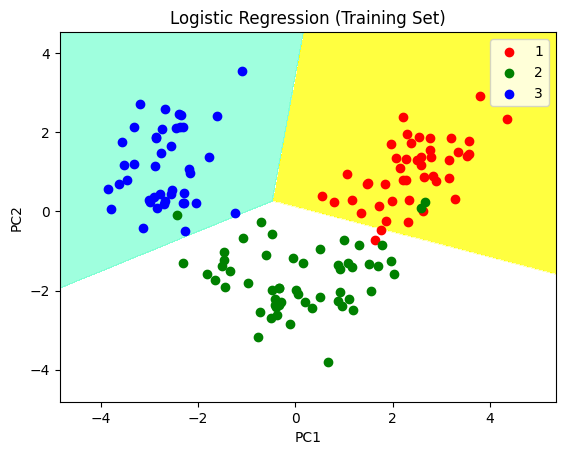

<ipython-input-3-c253650d4599>:53: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


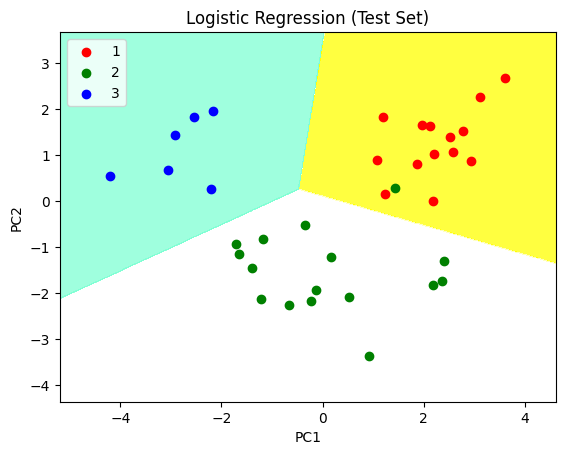

In [ ]:
# Principal Component Analysis (PCA) with Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

# ========== 1. Load and Preprocess Data ==========
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

# Split into training and test sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ========== 2. Apply PCA ==========
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# ========== 3. Train Logistic Regression ==========
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Predictions
y_pred = classifier.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ========== 4. Visualization Functions ==========
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha=0.75, cmap=ListedColormap(('yellow', 'white', 'aquamarine')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green', 'blue'))(i), label=j)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()

# ========== 5. Generate Plots ==========
# Training set results
plot_decision_boundary(X_train_pca, y_train, 'Logistic Regression (Training Set)')

# Test set results
plot_decision_boundary(X_test_pca, y_test, 'Logistic Regression (Test Set)')